In [1]:
from pymongo import MongoClient
import datetime
import FuncRepo
import pandas
import pandas_profiling
import numpy as np
import pprint
client = MongoClient('mongodb://10.233.42.60:27017') # Establece una conexión a MongoDB
#client = MongoClient('mongodb://localhost:27017')
db = client['local'] # Seleccionamos la base de datos "local". 
#También funciona el acceso a través del atributo:
#db = client.local
pacientes = db['PacientesRT'] # Seleccionamos la colección "PacientesRT", que está dentro de la base de datos local

In [2]:
start_date = datetime.datetime(2020, 4, 1, 0, 0, 0)
end_date = datetime.datetime(2020, 6, 30, 0, 0, 0)

In [8]:
df_planificaciones = pandas.DataFrame(FuncRepo.consulta_planificaciones(pacientes, start_date, end_date))
tabla_demoras_plan = pandas.pivot_table(df_planificaciones,
                       index=['Patologia'],
                       values=["Demora_Prescripcion-Plan"],
                       columns=["Verificacion"],
                       aggfunc=np.mean,
                       fill_value=0,
                       margins=True).round(2)
print(tabla_demoras_plan)


Consulta: Pacientes con alguna planificación entre 01/04/2020 y 30/06/2020
Numero de pacientes que cumplen la consulta: 294

Numero de pacientes con problemas: 2
{'AN0453579778': 'JOSE MESA ANDUJAR. Demora prescripcion-planificacion de 84'}
{'AN0518144190': 'JOSE CARLOS GOMEZ GRACIA. Demora prescripcion-planificacion de 56'}

                Demora_Prescripcion-Plan             
Verificacion                          No     Si   All
Patologia                                            
Adenocarcinomas                     3.73   3.89  3.79
Cabeza y cuello                     1.25  12.10  9.00
Carcinomas                          1.66   8.94  3.70
Cérvix                              0.00  11.50  7.67
Glioma                              2.60   6.00  3.17
Linfomas                            3.80   8.29  6.42
Mama                                3.39   4.64  3.63
Próstata                            1.00   5.50  4.12
Pulmón                              2.00   6.50  3.12
Recto                  

In [42]:
df=tabla_demoras_plan
df2 = df.reset_index() # reset the index so row labels show up in the reportlab table
n = df2.columns.nlevels # number of table header rows to repeat
if n > 1:
    labels1 = [list(val) for val in df2.columns.values]
    labels1 = [list(i) for i in zip(*labels1)]  #transponemos la lista
    labels = [labels1[:][n-1]]  # nos quedamos con el último nivel de columnas
    #labels = map(list, zip(*df2.columns.values[1]))
else:
    labels = [df2.columns[:,].values.astype(str).tolist()]
values = df2.values.tolist()
datalist = labels + values
print(len(datalist))

12


In [24]:
print(df_planificaciones.groupby(["Patologia","Verificacion"])["Demora_Prescripcion-Plan","Numero"].agg({
    "Demora_Prescripcion-Plan":"mean",
    "Numero": "sum"
}))

                              Demora_Prescripcion-Plan  Numero
Patologia       Verificacion                                  
Adenocarcinomas No                            3.733333      15
                Si                            3.888889       9
Cabeza y cuello No                            1.250000       4
                Si                           12.100000      10
Carcinomas      No                            1.658537      41
                Si                            8.937500      16
Cérvix          No                            0.000000       1
                Si                           11.500000       2
Glioma          No                            2.600000       5
                Si                            6.000000       1
Linfomas        No                            3.800000       5
                Si                            8.285714       7
Mama            No                            3.387097      93
                Si                            4.636364 

C:\Users\Hector\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
print(df_planificaciones.groupby(["Patologia"])["Demora_Prescripcion-Plan","Numero"].agg({
    "Demora_Prescripcion-Plan":"mean",
    "Numero": "sum"
}))

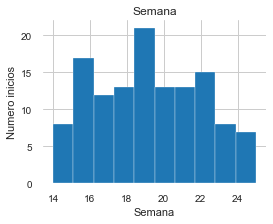

In [5]:
import matplotlib.pyplot as plt
from io import BytesIO
from io import StringIO
from reportlab.lib.utils import ImageReader

plt.rcParams["figure.figsize"] = (4,3)
df_sesiones.hist('Semana')
plt.xlabel("Semana")
plt.ylabel("Numero inicios")
fig = plt.gcf()

<PandasArray>
[18, 17, 17, 15, 16, 16, 18, 16, 19, 18,
 ...
 23, 20, 22, 25, 22, 22, 21, 25, 21, 21]
Length: 127, dtype: int64


(array([ 2.,  6., 17., 12., 13., 21., 13., 13., 15.,  8.,  7.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]),
 <a list of 11 Patch objects>)

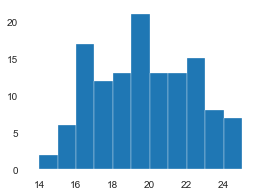

In [6]:
h = df_sesiones['Semana']
hist=h.array
print(hist)
plt.hist(hist,bins=(np.max(hist)-np.min(hist)))

[ 8 17 12 13 21 13 13 15  8  7] [14.  15.1 16.2 17.3 18.4 19.5 20.6 21.7 22.8 23.9 25. ]
[14.  15.1 16.2 17.3 18.4 19.5 20.6 21.7 22.8 23.9]


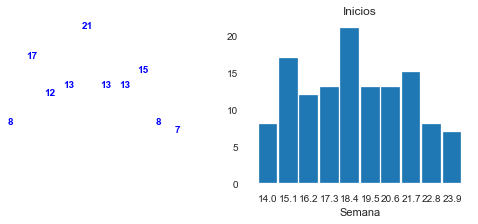

In [7]:
hist, bins = np.histogram(df_sesiones['Semana'].array)
print((hist),(bins))
bins = bins[0:(len(bins)-1)]
print(bins)
fig, ax = plt.subplots()
ax.bar(bins, hist, width=1, align='center')
ax.set(xticks=bins)
ax.set_title('Inicios')
ax.set_xlabel('Semana')
for i, v in enumerate(hist):
    ax.text(i, v,str(v), color='blue', fontweight='bold')
plt.show()

<class 'pandas.core.series.Series'>
<PandasArray>
[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Length: 12, dtype: int64
[ 2  6 17 12 13 21 13 13 15  8  5  2]


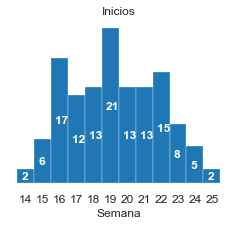

In [48]:
hist = df_sesiones.groupby(['Semana']).sum()["Numero"]
fig, ax = plt.subplots()
bars = ax.bar(hist.index.array, hist.to_numpy(), width=1, align='center')
ax.set(xticks=hist.index.array)
ax.set_title('Inicios')
ax.set_xlabel('Semana')

for bar in bars:
    text = bar.get_height()

    text_x = bar.get_x() + bar.get_width()/4
    text_y = 0.5*bar.get_height()

    ax.text(text_x, text_y, text, va='center', color='white', fontweight='bold', fontsize=12)
ax.get_yaxis().set_visible(False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)


Consulta: Pacientes con primera sesión de tratamiento entre 01/04/2020 y 30/06/2020
Numero de pacientes que cumplen la consulta: 127

Numero de pacientes con problemas: 1
{'AN0471223775': 'MARIA ANGELES FABRIQUE DURAN. Fecha de inicio de tratamiento anterior a la planificación -13 días'}


Consulta: Pacientes con alguna planificación entre 01/04/2020 y 30/06/2020
Numero de pacientes que cumplen la consulta: 285

Numero de pacientes con problemas: 3
{'AN0524299145': 'MARIA LUISA BUSTO PAREJO. Demora prescripcion-planificacion de 127'}
{'AN0453579778': 'JOSE MESA ANDUJAR. Demora prescripcion-planificacion de 84'}
{'AN0518144190': 'JOSE CARLOS GOMEZ GRACIA. Demora prescripcion-planificacion de 56'}



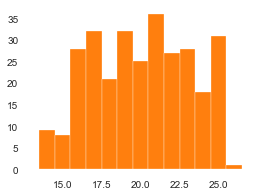

In [49]:
df_sesiones = pandas.DataFrame(FuncRepo.consulta_sesiones(pacientes, start_date, end_date))
df_planes = pandas.DataFrame(FuncRepo.consulta_planificaciones(pacientes, start_date, end_date))
hist_sesiones = df_sesiones.groupby(['Semana']).sum()["Numero"]
fig, ax = plt.subplots()
bars = ax.bar(hist_sesiones.index.array, hist_sesiones.to_numpy(), width=1, align='center')
hist_planes = df_planes.groupby(['Semana']).sum()["Numero"]
bars = ax.bar(hist_planes.index.array, hist_planes.to_numpy(), width=1, align='center')